# ¿Cuáles son los barrios con los precios más altos y más bajos, y cuáles son los factores que influyen en estos precios?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos limpios
df = pd.read_csv('datos_limpios.csv')

In [3]:
# Calcular precio promedio por barrio
barrio_precios = df.groupby('barrio')['precio_millones'].mean().reset_index()

# Ordenar por precio
barrio_precios = barrio_precios.sort_values(by='precio_millones', ascending=False)

# Top 10 barrios más caros y más baratos
top_caros = barrio_precios.head(10)
top_baratos = barrio_precios.tail(10)

print(top_caros)
print(top_baratos)

             barrio  precio_millones
335           santa           1950.0
211   la portada al           1500.0
367      tequendema           1500.0
217     la riverita           1390.0
370  unicentro cali           1250.0
179       ingenio i           1200.0
23         arboleda           1162.0
264       normandia           1016.0
244     los jockeys           1000.0
72         cascajal            980.0
                  barrio  precio_millones
112    ciudadela del río        95.000000
234        los alcazares        93.058824
58            cali bella        93.000000
175            guaduales        92.500000
206             la luisa        87.000000
393       villa del lago        86.400000
86           chiminangos        86.166667
88   chiminangos 2 etapa        83.000000
235        los alcázares        74.200000
45           bolivariano        72.000000


C:\Users\guerr\AppData\Local\Temp\ipykernel_20716\2645016724.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tipo_vivienda', y='precio_millones', palette='coolwarm')


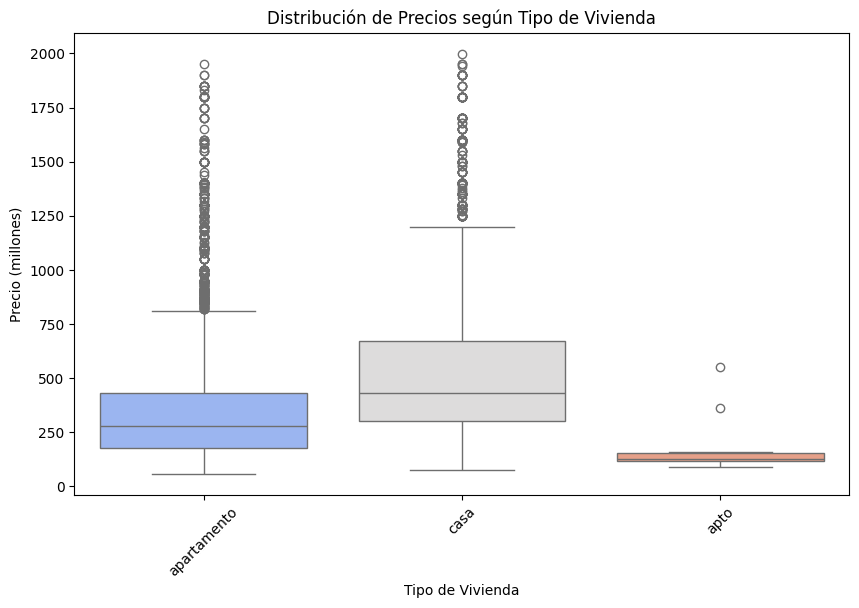

C:\Users\guerr\AppData\Local\Temp\ipykernel_20716\2645016724.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='estrato', y='precio_millones', palette='magma')


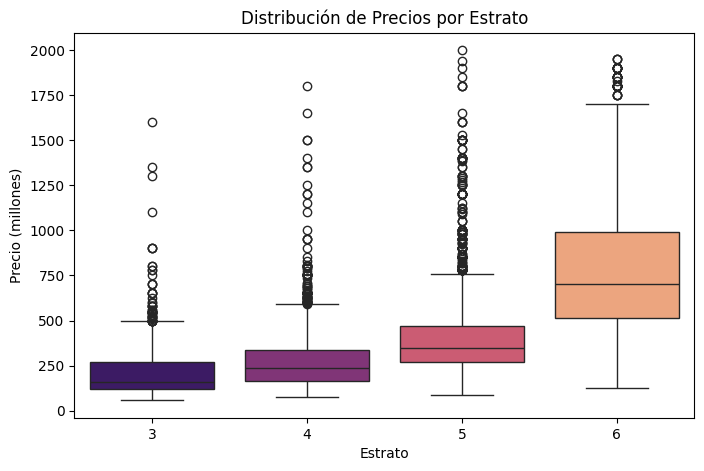

C:\Users\guerr\AppData\Local\Temp\ipykernel_20716\2645016724.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zona_precios, x='precio_millones', y='zona', palette='viridis')


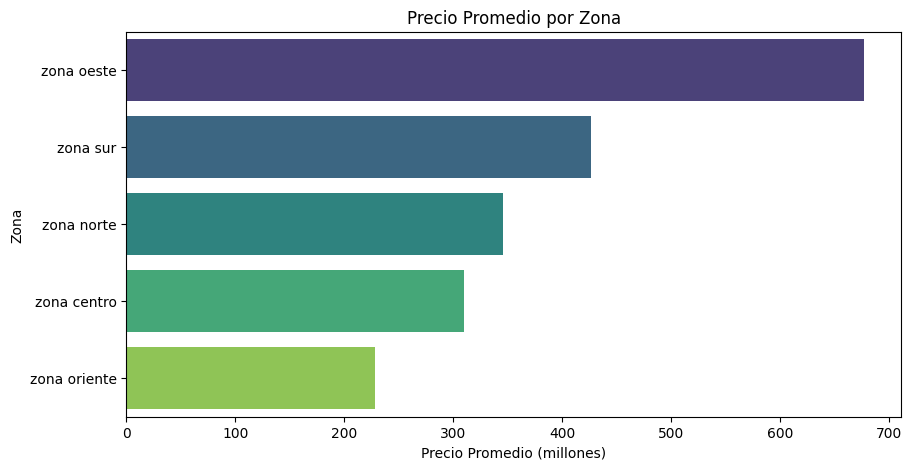

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Boxplot: Precio por Tipo de Vivienda
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='tipo_vivienda', y='precio_millones', palette='coolwarm')
plt.xlabel("Tipo de Vivienda")
plt.ylabel("Precio (millones)")
plt.title("Distribución de Precios según Tipo de Vivienda")
plt.xticks(rotation=45)
plt.show()

# 🔹 Boxplot: Precio por Estrato
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='estrato', y='precio_millones', palette='magma')
plt.xlabel("Estrato")
plt.ylabel("Precio (millones)")
plt.title("Distribución de Precios por Estrato")
plt.show()

# 🔹 Gráfico de Barras: Precio Promedio por Zona
zona_precios = df.groupby('zona')['precio_millones'].mean().reset_index().sort_values(by='precio_millones', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=zona_precios, x='precio_millones', y='zona', palette='viridis')
plt.xlabel("Precio Promedio (millones)")
plt.ylabel("Zona")
plt.title("Precio Promedio por Zona")
plt.show()


C:\Users\guerr\AppData\Local\Temp\ipykernel_20716\133376084.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=var_df, x='Varianza en Precio', y='Factor', palette='plasma')


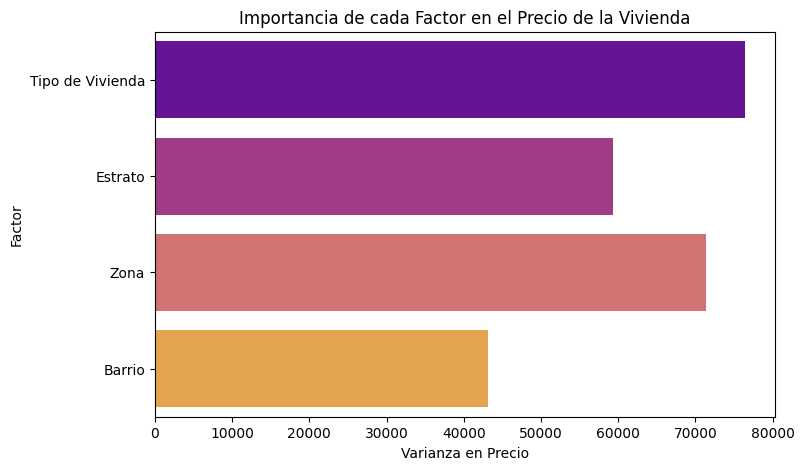

In [5]:
# Cálculo de la varianza del precio dentro de cada categoría
var_tipo_vivienda = df.groupby('tipo_vivienda')['precio_millones'].var().mean()
var_estrato = df.groupby('estrato')['precio_millones'].var().mean()
var_zona = df.groupby('zona')['precio_millones'].var().mean()
var_barrio = df.groupby('barrio')['precio_millones'].var().mean()

# Mostrar qué factor tiene mayor varianza en precios
var_dict = {
    "Tipo de Vivienda": var_tipo_vivienda,
    "Estrato": var_estrato,
    "Zona": var_zona,
    "Barrio": var_barrio
}

# Convertir en DataFrame para graficar
var_df = pd.DataFrame(list(var_dict.items()), columns=['Factor', 'Varianza en Precio'])

# Gráfico de barras de importancia de factores
plt.figure(figsize=(8,5))
sns.barplot(data=var_df, x='Varianza en Precio', y='Factor', palette='plasma')
plt.xlabel("Varianza en Precio")
plt.ylabel("Factor")
plt.title("Importancia de cada Factor en el Precio de la Vivienda")
plt.show()
